# **Project Phase 2: Model Execution Instructions**

This directory contains the source code for the 6 machine learning and statistical models applied to the NYC Green Taxi dataset for the EAS 587 course project.

## **Requirements**

* A web browser  
* A Google Account (for using Google Colab)

## **Files Included**

* `taxi_data.csv`: The dataset used by all notebooks.  
* `model_1_LinearRegression.ipynb`: Notebook for the Linear Regression model.  
* `model_2_KNN.ipynb`: Notebook for K-Nearest Neighbors and K-Means models.  
* `model_3_DecisionTree.ipynb`: Notebook for the Decision Tree classification model.  
* `model_4_RandomForest.ipynb`: Notebook for the Random Forest regression model.  
* `model_5_DBSCAN.ipynb`: Notebook for the DBSCAN clustering model.  
* `model_6_ARIMA.ipynb`: Notebook for the ARIMA and Prophet time-series models.

## **Step-by-Step Execution Instructions**

To reproduce the results, please follow these steps for each of the 6 notebooks.

1. **Navigate to Google Colab** Open your web browser and go to [https://colab.research.google.com/](https://colab.research.google.com/).  
2. **Upload Project Files** On the left-hand side of the Colab interface, click the **"Files"** icon (it looks like a folder). Click the **"Upload to session storage"** icon and select all the files from this `src/` directory (the 6 `.ipynb` notebooks and `taxi_data.csv`). Wait for all files to finish uploading.  
3. **Open a Notebook** In the file browser on the left, double-click on one of the notebook files (e.g., `LinearRegression.ipynb`) to open it in the main editor.  
4. **Run the Notebook** Once the notebook is open and has connected to a runtime, go to the top menu and select **Runtime \-\> Run all**.  
5. **View Results** The notebook will now execute from the first cell to the last, producing all the model metrics, tables, and visualizations described in the report.  
6. **Repeat for Other Models** Repeat steps 3-5 for the remaining 5 notebook files to see the results for each model. Make sure you upload the `taxi_data.csv` file for every python notebook.

**Important Note on Colab Runtimes:** The files uploaded to a Google Colab session are temporary. If your session disconnects or times out (e.g., after being idle), the uploaded files will be deleted. If this happens, you will need to re-upload the `taxi_data.csv` file (Step 2).



/tmp/ipython-input-1981468772.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("taxi_data.csv")


Dataset loaded successfully!
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2     01-01-2023 00:26      01-01-2023 00:37                  N   
1         2     01-01-2023 00:51      01-01-2023 00:57                  N   
2         2     01-01-2023 00:35      01-01-2023 00:41                  N   
3         1     01-01-2023 00:13      01-01-2023 00:19                  N   
4         1     01-01-2023 00:33      01-01-2023 00:39                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  t

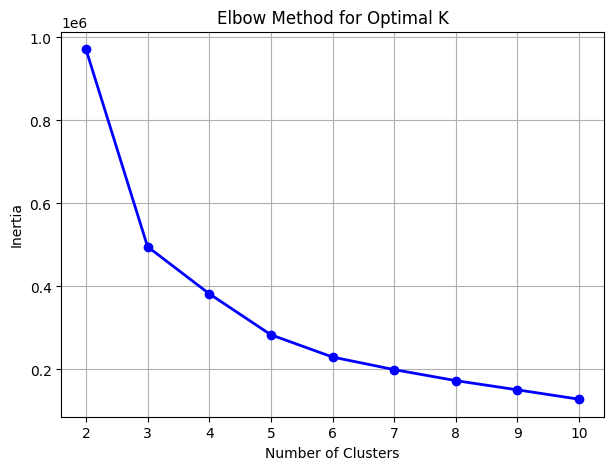

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


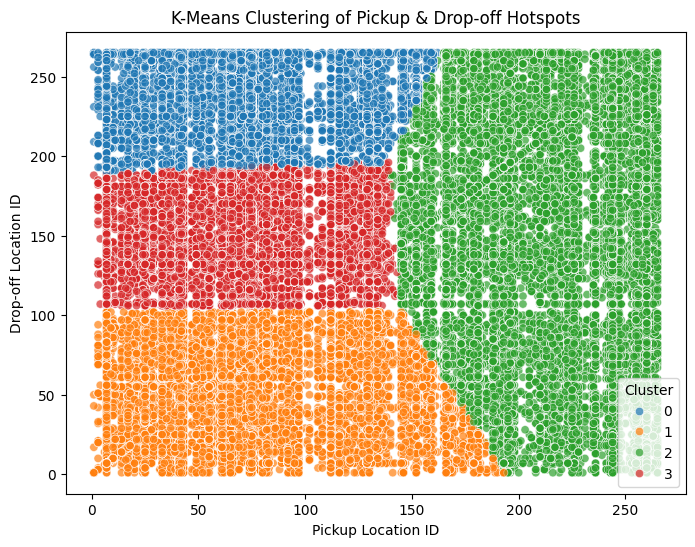


Cluster Centroids:
    PULocationID  DOLocationID
0     72.452077    238.305239
1     75.574979     58.704939
2    208.609856    160.577009
3     75.085185    147.796847

Trips per Cluster:
 Cluster
0    178029
1    275231
2    139469
3    194331
Name: count, dtype: int64


/tmp/ipython-input-1981468772.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


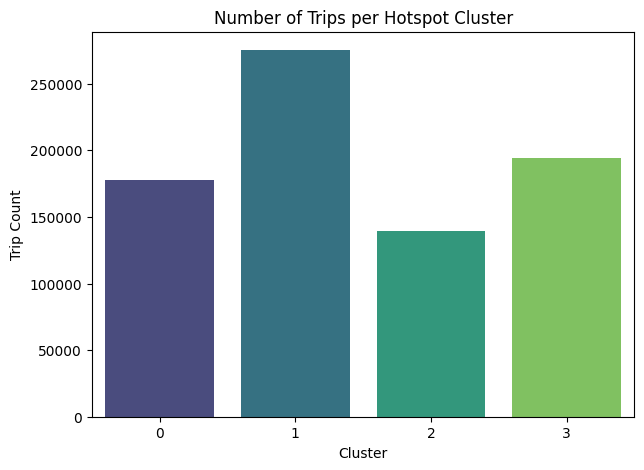


✅ K-Means clustering complete — hotspot zones identified!


In [1]:
# ------------------------------------------
# Step 1: Import libraries
# ------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# ------------------------------------------
# Step 2: Load your dataset
# ------------------------------------------
# Replace the path below with your dataset path
df = pd.read_csv("taxi_data.csv")

# Display basic info
print("Dataset loaded successfully!")
print(df.head())
print("\nColumns available:", df.columns)

# ------------------------------------------
# Step 3: Select relevant features for clustering
# ------------------------------------------
if 'PULocationID' in df.columns and 'DOLocationID' in df.columns:
    df_cluster = df[['PULocationID', 'DOLocationID']].copy()
else:
    # Example fallback: create fake pickup/drop-off columns if not present
    import numpy as np
    df_cluster = pd.DataFrame({
        'PULocationID': np.random.randint(1, 265, size=len(df)),
        'DOLocationID': np.random.randint(1, 265, size=len(df))
    })
    print("\n⚠️ PULocationID and DOLocationID not found — using simulated values for demo.\n")

# Remove any missing or invalid values
df_cluster = df_cluster.dropna()

# ------------------------------------------
# Step 4: Standardize data for clustering
# ------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# ------------------------------------------
# Step 5: Determine optimal number of clusters using Elbow Method
# ------------------------------------------
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# ------------------------------------------
# Step 6: Train final KMeans model (choose K based on Elbow, say 4)
# ------------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# ------------------------------------------
# Step 7: Visualize clusters
# ------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PULocationID', y='DOLocationID',
    hue='Cluster', palette='tab10', data=df_cluster, alpha=0.7
)
plt.title('K-Means Clustering of Pickup & Drop-off Hotspots')
plt.xlabel('Pickup Location ID')
plt.ylabel('Drop-off Location ID')
plt.legend(title='Cluster')
plt.show()

# ------------------------------------------
# Step 8: View cluster centroids
# ------------------------------------------
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['PULocationID', 'DOLocationID'])
print("\nCluster Centroids:\n", centroids_df)

# ------------------------------------------
# Step 9: Analyze busiest clusters
# ------------------------------------------
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
print("\nTrips per Cluster:\n", cluster_counts)

plt.figure(figsize=(7, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Trips per Hotspot Cluster')
plt.xlabel('Cluster')
plt.ylabel('Trip Count')
plt.show()

print("\n✅ K-Means clustering complete — hotspot zones identified!")
